In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

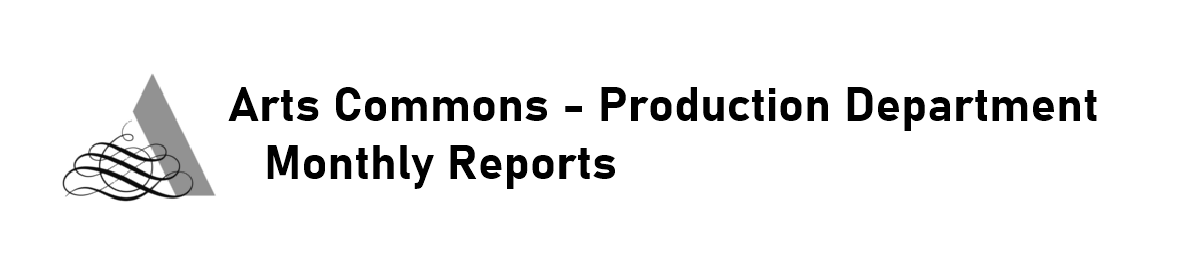

In [3]:
from IPython.display import Image
Image("img/for_jupyter.png")

In [4]:
my_date = 'May 1, 2021'

In [5]:
print(f'The data is this notebook is valid through {my_date}')

The data is this notebook is valid through May 1, 2021


---

# Head Salaried Hours Worked by Account Code - Current Fiscal Year

This Report does the following:
 - takes over time and double time hours and converts them to regular time hours
 - sums the regular time, converted over time, and converted double time hours 
 - calcualtes the percentage of the reports hours each line represents
 
 There is a report including all salaried staff hours, and one report for each current staff member.  The reports reflect incormation form the current fiscal year.

In [6]:
import pandas as pd
import db_functions as dbfnc
import config as cfg

# grab data from the db and input it to a df
# the query is HeadworkedTable joined with ShowTable joined with HeadNamesTable filtered on ShowName 'FLEX DAY'
sql_file=open(f'{cfg.sql_dir}\head_hours_worked.sql')
query = sql_file.read()

with dbfnc.connection(cfg.my_driver, cfg.my_server, cfg.my_db) as conn:
    df = pd.read_sql(query, conn)
    
# turn the datetime64 object into a string object for manipultaion
df['Date_String'] = df['ShiftDate'].dt.strftime('%Y-%m-%d')

# filter for current fiscal year only
filter_mask = df.Date_String.apply(dbfnc.current_fiscal) 
df = df[filter_mask]

# Overtime conversions
df['OT_convert'] = df.OverTimeHours.apply(lambda x:x*1.5)
df['DT_convert'] = df.DoubleTimeHours.apply(lambda x:x*2)

# Combine all hours
sum_cols =['RegTimeHours', 'OT_convert', 'DT_convert']
df['all_hrs'] = df[sum_cols].sum(axis=1)
#create percent column
df['percent'] = (df['all_hrs'] / df['all_hrs'].sum()) * 100
df.percent = df.percent.round(2)

#### Hours Worked - All

In [7]:
# create the new df removing uneeded column data
df_all = df[['AccountCodeID', 'Note', 'RegTimeHours', 'OT_convert', 'DT_convert', 'all_hrs', 'percent']].copy()

# sum and present the data
df_all.groupby(['AccountCodeID', 'Note']).sum()

,,RegTimeHours,OT_convert,DT_convert,all_hrs,percent
AccountCodeID,Note,,,,,
6200-50-504,Engineered Air Salaried Billable,37.00,3.000,0.0,40.000,0.34
6210-50-504,Jack Singer Salaried Billable,122.50,1.125,2.5,126.125,1.11
7280-20-204,LX Res Co,17.50,0.000,0.0,17.500,0.14
7290-50-504,LX Maintenance,97.00,0.000,0.0,97.000,0.93
7420-20-204,Snd Res Co,4.50,0.000,0.0,4.500,0.04
7430-50-504,Sound Maintenance,200.50,0.000,0.0,200.500,1.86
7470-20-204,Stg Res Co,12.75,0.000,0.0,12.750,0.11
7480-50-504,Stage Maintenance,815.00,0.000,0.0,815.000,7.45
8430-50-504,Salaried Admin,5160.50,0.000,0.0,5160.500,46.34


---

#### Hours Worked - Arran 

In [8]:
# kill the SettingWithCopy Warning
pd.options.mode.chained_assignment = None  # default='warn'

# filter for Arran
filter_mask = df['FirstName'] == "Arran"
df_af = df[filter_mask]

#create percent column
df_af['percent'] = (df_af['all_hrs'] / df_af['all_hrs'].sum()) * 100
df_af.percent = df_af.percent.round(2)

# create the new df removing uneeded column data
df_af = df_af[['AccountCodeID', 'Note', 'RegTimeHours', 'OT_convert', 'DT_convert', 'all_hrs', 'percent']].copy()

# sum and present the data
df_af.groupby(['AccountCodeID', 'Note']).sum()

,,RegTimeHours,OT_convert,DT_convert,all_hrs,percent
AccountCodeID,Note,,,,,
6200-50-504,Engineered Air Salaried Billable,37.00,3.0,0.0,40.00,2.89
6210-50-504,Jack Singer Salaried Billable,12.50,0.0,0.0,12.50,0.90
7290-50-504,LX Maintenance,17.50,0.0,0.0,17.50,1.27
7430-50-504,Sound Maintenance,32.50,0.0,0.0,32.50,2.33
8430-50-504,Salaried Admin,1106.75,0.0,0.0,1106.75,79.22
8455-50-504,Vacation/Holiday/Flex/Sick,161.00,0.0,0.0,161.00,11.49
CRF,Capital replacement,24.00,0.0,0.0,24.00,1.74


---

#### Hours Worked - David 

In [9]:
# filter for David
filter_mask = df['FirstName'] == "David"
df_dm = df[filter_mask]

#create percent column
df_dm['percent'] = (df_dm['all_hrs'] / df_dm['all_hrs'].sum()) * 100
df_dm.percent = df_dm.percent.round(2)

# create the new df removing uneeded column data
df_dm = df_dm[['AccountCodeID', 'Note', 'RegTimeHours', 'OT_convert', 'DT_convert', 'all_hrs', 'percent']].copy()

# sum and present the data
df_dm.groupby(['AccountCodeID', 'Note']).sum()

,,RegTimeHours,OT_convert,DT_convert,all_hrs,percent
AccountCodeID,Note,,,,,
8430-50-504,Salaried Admin,1202.5,0.0,0.0,1202.5,86.22
8455-50-504,Vacation/Holiday/Flex/Sick,190.5,0.0,0.0,190.5,13.59


---

#### Hours Worked - Jack 

In [10]:
# filter for Jack
filter_mask = df['FirstName'] == "Jack"
df_jj = df[filter_mask]

#create percent column
df_jj['percent'] = (df_jj['all_hrs'] / df_jj['all_hrs'].sum()) * 100
df_jj.percent = df_jj.percent.round(2)

# create the new df removing uneeded column data
df_jj = df_jj[['AccountCodeID', 'Note', 'RegTimeHours', 'OT_convert', 'DT_convert', 'all_hrs', 'percent']].copy()

# sum and present the data
df_jj.groupby(['AccountCodeID', 'Note']).sum()

,,RegTimeHours,OT_convert,DT_convert,all_hrs,percent
AccountCodeID,Note,,,,,
6210-50-504,Jack Singer Salaried Billable,14.0,0.000,0.0,14.000,1.01
7420-20-204,Snd Res Co,4.5,0.000,0.0,4.500,0.32
7430-50-504,Sound Maintenance,80.0,0.000,0.0,80.000,5.71
8430-50-504,Salaried Admin,47.0,0.000,0.0,47.000,3.34
8455-50-504,Vacation/Holiday/Flex/Sick,160.0,0.000,0.0,160.000,11.41
CRF,Capital replacement,1086.5,3.375,2.5,1092.375,78.27


---

#### Hours Worked - Jaclyn 

In [11]:
# filter for Jaclyn
filter_mask = df['FirstName'] == "Jaclyn"
df_jg = df[filter_mask]

#create percent column
df_jg['percent'] = (df_jg['all_hrs'] / df_jg['all_hrs'].sum()) * 100
df_jg.percent = df_jg.percent.round(2)

# create the new df removing uneeded column data
df_jg  = df_jg [['AccountCodeID', 'Note', 'RegTimeHours', 'OT_convert', 'DT_convert', 'all_hrs', 'percent']].copy()

# sum and present the data
df_jg.groupby(['AccountCodeID', 'Note']).sum()

,,RegTimeHours,OT_convert,DT_convert,all_hrs,percent
AccountCodeID,Note,,,,,
6210-50-504,Jack Singer Salaried Billable,35.0,0.375,2.5,37.875,2.73
7470-20-204,Stg Res Co,4.5,0.000,0.0,4.500,0.32
7480-50-504,Stage Maintenance,320.5,0.000,0.0,320.500,23.10
8430-50-504,Salaried Admin,810.0,0.000,0.0,810.000,58.54
8455-50-504,Vacation/Holiday/Flex/Sick,121.0,0.000,0.0,121.000,8.62
8870-50-504,Training,2.5,0.000,0.0,2.500,0.18
CRF,Capital replacement,98.5,0.000,0.0,98.500,7.06


---

#### Hours Worked - Kris 

In [12]:
# filter for Kris
filter_mask = df['FirstName'] == "Kris"
df_kl = df[filter_mask]

#create percent column
df_kl['percent'] = (df_kl['all_hrs'] / df_kl['all_hrs'].sum()) * 100
df_kl.percent = df_kl.percent.round(2)

# create the new df removing uneeded column data
df_kl= df_kl[['AccountCodeID', 'Note', 'RegTimeHours', 'OT_convert', 'DT_convert', 'all_hrs', 'percent']].copy()

# sum and present the data
df_kl.groupby(['AccountCodeID', 'Note']).sum()

,,RegTimeHours,OT_convert,DT_convert,all_hrs,percent
AccountCodeID,Note,,,,,
7280-20-204,LX Res Co,16.50,0.0,0.0,16.50,1.19
7290-50-504,LX Maintenance,17.50,0.0,0.0,17.50,1.27
8430-50-504,Salaried Admin,187.25,0.0,0.0,187.25,13.52
8455-50-504,Vacation/Holiday/Flex/Sick,108.00,0.0,0.0,108.00,7.70
9999-99-999,OFF BUDGET,0.75,0.0,0.0,0.75,0.05
CRF,Capital replacement,1062.00,0.0,0.0,1062.00,76.49


---

#### Hours Worked - Matt 

In [13]:
# filter for Matt
filter_mask = df['FirstName'] == "Matt"
df_mg = df[filter_mask]

#create percent column
df_mg['percent'] = (df_mg['all_hrs'] / df_mg['all_hrs'].sum()) * 100
df_mg.percent = df_mg.percent.round(2)

# create the new df removing uneeded column data
df_mg = df_mg[['AccountCodeID', 'Note', 'RegTimeHours', 'OT_convert', 'DT_convert', 'all_hrs', 'percent']].copy()

# sum and present the data
df_mg.groupby(['AccountCodeID', 'Note']).sum()

,,RegTimeHours,OT_convert,DT_convert,all_hrs,percent
AccountCodeID,Note,,,,,
6210-50-504,Jack Singer Salaried Billable,17.0,0.0,0.0,17.0,1.23
7280-20-204,LX Res Co,1.0,0.0,0.0,1.0,0.07
7290-50-504,LX Maintenance,59.0,0.0,0.0,59.0,4.26
7480-50-504,Stage Maintenance,52.0,0.0,0.0,52.0,3.76
8430-50-504,Salaried Admin,282.5,0.0,0.0,282.5,20.29
8440-20-203,Lance Labour,9.0,0.0,0.0,9.0,0.64
8455-50-504,Vacation/Holiday/Flex/Sick,204.0,0.0,0.0,204.0,14.57
CRF,Capital replacement,767.5,0.0,0.0,767.5,55.54


---

#### Hours Worked - Rikki 

In [14]:
# filter for Rikki
filter_mask = df['FirstName'] == "Rikki"
df_rs = df[filter_mask]

#create percent column
df_rs['percent'] = (df_rs['all_hrs'] / df_rs['all_hrs'].sum()) * 100
df_rs.percent = df_rs.percent.round(2)

# create the new df removing uneeded column data
df_rs = df_rs[['AccountCodeID', 'Note', 'RegTimeHours', 'OT_convert', 'DT_convert', 'all_hrs', 'percent']].copy()

# sum and present the data
df_rs.groupby(['AccountCodeID', 'Note']).sum()

,,RegTimeHours,OT_convert,DT_convert,all_hrs,percent
AccountCodeID,Note,,,,,
6210-50-504,Jack Singer Salaried Billable,44.00,0.75,0.0,44.75,3.22
7290-50-504,LX Maintenance,3.00,0.00,0.0,3.00,0.22
7430-50-504,Sound Maintenance,5.50,0.00,0.0,5.50,0.39
7470-20-204,Stg Res Co,8.25,0.00,0.0,8.25,0.59
7480-50-504,Stage Maintenance,442.00,0.00,0.0,442.00,31.91
8430-50-504,Salaried Admin,694.75,0.00,0.0,694.75,49.94
8455-50-504,Vacation/Holiday/Flex/Sick,111.50,0.00,0.0,111.50,8.08
CRF,Capital replacement,80.50,0.00,0.0,80.50,5.83


---

#### Hours Worked - Terry 

In [15]:
# filter for Terry
filter_mask = df['FirstName'] == "Terry"
df_ta = df[filter_mask]

#create percent column
df_ta['percent'] = (df_ta['all_hrs'] / df_ta['all_hrs'].sum()) * 100
df_ta.percent = df_ta.percent.round(2)

# create the new df removing uneeded column data
df_ta = df_ta[['AccountCodeID', 'Note', 'RegTimeHours', 'OT_convert', 'DT_convert', 'all_hrs', 'percent']].copy()

# sum and present the data
df_ta.groupby(['AccountCodeID', 'Note']).sum()

,,RegTimeHours,OT_convert,DT_convert,all_hrs,percent
AccountCodeID,Note,,,,,
7430-50-504,Sound Maintenance,82.50,0.0,0.0,82.50,5.94
7480-50-504,Stage Maintenance,0.50,0.0,0.0,0.50,0.04
8430-50-504,Salaried Admin,829.75,0.0,0.0,829.75,59.25
8455-50-504,Vacation/Holiday/Flex/Sick,129.00,0.0,0.0,129.00,9.20
CRF,Capital replacement,350.25,0.0,0.0,350.25,25.20


---

## LIEU hours

This report gives the balance of hours accrued by each staff member.  The calcualtion involves converting over time and double time to regualr time, summing those lines, removing hours payed out, and calcualting hours owed per week based on a 40 hour work week. 

In [16]:
from datetime import date, timedelta

# grab data from the db and input it to a df
# the query is HeadworkedTable joined with ShowTable joined with HeadNamesTable filtered on ShowName 'FLEX DAY'
sql_file=open(f'{cfg.sql_dir}\lieu_hours.sql')
query = sql_file.read()

with dbfnc.connection(cfg.my_driver, cfg.my_server, cfg.my_db) as conn:
    df = pd.read_sql(query, conn)
    
# filter out those who have left the company
remove_list = ['Juan', 'Donnie', 'Phil']
filter_mask = ~df['FirstName'].isin(remove_list)
df = df[filter_mask]

# create a day of the week number (Sun == 6, Mon == 0)
df['day-of-week']=df['ShiftDate'].dt.dayofweek

# function to calcualte the weekending date
def wk_ending(my_df):
    if my_df[6]==6:
        wk_end_offset = 6
    else:
        wk_end_offset =5-my_df[6]
    wkend_date = pd.Timestamp(my_df[1] + timedelta(days=wk_end_offset))
    return wkend_date

# add the week ending date
df['week_ending'] = df.apply(wk_ending, axis=1)

# Overtime conversions
df['OT_convert'] = df.OverTimeHours.apply(lambda x:x*1.5)
df['DT_convert'] = df.DoubleTimeHours.apply(lambda x:x*2)

# convert the payouts to negative integers 
df['neg_payouts'] = df.Payoutinhrs.apply(lambda x:x*-1)

# Combine all hours
sum_cols =['RegTimeHours', 'OT_convert', 'DT_convert']
df['all_hrs_wrkd'] = df[sum_cols].sum(axis=1)

# sum and present the data
df = df.groupby(['FirstName','week_ending']).sum().reset_index()

#df['hours_owed'] = df.apply(over_under, axis=1)
df['hours_owed'] = -40

sum_cols =['all_hrs_wrkd', 'hours_owed', 'neg_payouts']
df['balance'] = df[sum_cols].sum(axis=1)

# create the new df removing uneeded column data
df = df[['FirstName', 'week_ending', 'balance']].copy()

df = df.groupby(['FirstName']).sum().round(2)

df

,balance
FirstName,
Arran,2.25
David,0.00
Jack,3.37
Jaclyn,2.87
Kris,0.00
Matt,-10.38
Rikki,-3.12
Terry,-1.25


## TOIL Payouts to Heads - Current Fiscal Year

This report sums the payouts recived by each salaried head staff member this fiscal year and reports those values in hours.

In [17]:
# grab data from the db and input it to a df
# the query is HeadworkedTable joined with ShowTable joined with HeadNamesTable filtered on ShowName 'FLEX DAY'
sql_file=open(f'{cfg.sql_dir}\TOIL_payouts.sql')
query = sql_file.read()

with dbfnc.connection(cfg.my_driver, cfg.my_server, cfg.my_db) as conn:
    df = pd.read_sql(query, conn)
    
# turn the datetime64 object into a string object for manipultaion
df['Date_String'] = df['PayoutDate'].dt.strftime('%Y-%m-%d')

# filter for current fiscal year only
filter_mask = df.Date_String.apply(dbfnc.current_fiscal) 
df = df[filter_mask]

In [18]:
# sum and group each heads hours. 

In [19]:
# create the new df removing uneeded column data
df = df[['FirstName', 'PayoutinHrs']].copy()

#.. and style for preentation
df.style.set_properties(**{'text-align':'center'}).hide_index()

FirstName,PayoutinHrs
Arran,0.250000
Jaclyn,0.400000


## Head FLEX Days Used - Last 12 months

This report lists the FLEX DAYS used by the salaried heads within the last 12 months.  

In [20]:
# grab data from the db and input it to a df
# the query is HeadworkedTable joined with ShowTable joined with HeadNamesTable filtered on ShowName 'FLEX DAY'
sql_file=open(f'{cfg.sql_dir}\head_toil_days.sql')
query = sql_file.read()

with dbfnc.connection(cfg.my_driver, cfg.my_server, cfg.my_db) as conn:
    df = pd.read_sql(query, conn)
    
# filter for last 12 months
value_to_check = pd.Timestamp(date.today().year-1, date.today().month, date.today().day)
filter_mask = df['ShiftDate'] > value_to_check
df = df[filter_mask]

# FLEX DAYS only filter
filter_mask = df['ShowTitle'] == 'FLEX DAY'
df = df[filter_mask]

# turn the datetime64 object into a string object for manipultaion
df['Date_String'] = df['ShiftDate'].dt.strftime('%Y-%m-%d')

# create the fiscal info from the new string object
df['Fiscal Year'] = df.Date_String.apply(dbfnc.fiscal_yr)
df['Fiscal Quarter'] = df.Date_String.apply(dbfnc.fiscal_q)

# sort for presentation
df.sort_values(by='FirstName', inplace=True)
sort_list = ['Fiscal Year', 'Fiscal Quarter']
df.sort_values(by=sort_list, ascending=False, inplace=True)

#create the new df removing uneeded column data
df = df[['Fiscal Year', 'Fiscal Quarter', 'FirstName', 'Date_String']].copy()

#.. and style for preentation
df.style.set_properties(**{'text-align':'center'}).hide_index()

Fiscal Year,Fiscal Quarter,FirstName,Date_String
2020-2021,3,David,2021-04-01
2020-2021,3,Jaclyn,2021-04-19
2020-2021,3,Matt,2021-04-07
2020-2021,3,Matt,2021-04-07
2020-2021,3,Terry,2021-04-30
2020-2021,2,Arran,2021-02-05
2020-2021,2,David,2021-01-29
2020-2021,2,Jack,2021-01-14
2020-2021,2,Jaclyn,2020-12-11
2020-2021,2,Kris,2021-02-19
